# Mini Python Project: Simulating A/B Testing for a Recommendation System

In [1]:
# 🎯 Objective:
# Simulate user interactions with two versions of a recommendation model and perform A/B testing to determine if the new model improves conversion rate.

In [3]:
#  Required Libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

In [7]:
# Step 1: Generate Synthetic Data
np.random.seed(42)

# simulate 10,000 users
n_users = 10000

# Assign users randomly to Group A or B
groups = np.random.choice(['A', 'B'], size=n_users)

# Simulate conversion probabilities
# Control group (A): 3% conversion
# Test group (B): 4.2% conversion (hypothetically better)
conversion_prob = {'A':0.03, 'B':0.042}

# Simulate whether each user converted (1 = yes, 0 = no)
conversions = np.array([np.random.rand() < conversion_prob[group] for group in groups])

# Create DataFrame
df = pd.DataFrame({'user_id': range(1,n_users + 1), 'group': groups, 'converted': conversions.astype(int)})

df.head()

,user_id,group,converted
0,1,A,0
1,2,B,0
2,3,A,0
3,4,A,0
4,5,A,0


In [10]:
# Step 2: Compare Conversion Rates
group_summary = df.groupby('group')['converted'].agg(['mean','count','sum'])
group_summary.rename(columns={'mean':'conversion_rate'}, inplace=True)
print(group_summary)

       conversion_rate  count  sum
group                             
A             0.028127   5013  141
B             0.040906   4987  204


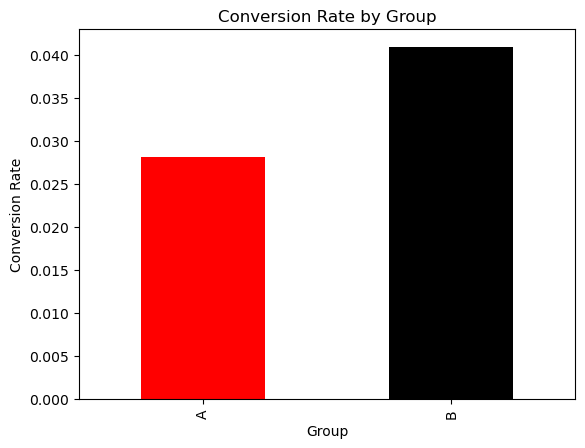

In [12]:
# Step 3: Visualize the Difference
group_summary['conversion_rate'].plot(kind='bar', color=['red', 'black'])
plt.title('Conversion Rate by Group')
plt.ylabel('Conversion Rate')
plt.xlabel('Group')
plt.show()

In [16]:
# Step 4: Statistical Significance (A/B Test)

#seperate data
conversions_A = df[df['group']=='A']['converted']
conversions_B = df[df['group']=='B']['converted']

# Two-sample t-test
t_stat, p_value = ttest_ind(conversions_A,conversions_B)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("✅ Statistically significant difference. Reject null hypothesis.")
else:
    print("❌ No significant difference. Fail to reject null hypothesis.")

T-statistic: -3.5028
P-value: 0.0005
✅ Statistically significant difference. Reject null hypothesis.
